imports

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt

im gonna load the dataset

In [10]:
data = pd.read_csv('taxi_trip_pricing.csv')

In [11]:
data

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


im checking for missing values

In [12]:
data.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [14]:
data = data.dropna()

In [15]:
data

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
14,9.91,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.9914
...,...,...,...,...,...,...,...,...,...,...,...
990,40.17,Evening,Weekday,3.0,Low,Clear,3.81,0.66,0.42,62.66,56.6394
992,14.34,Afternoon,Weekday,1.0,Medium,Clear,3.23,1.01,0.29,45.07,30.7837
994,18.69,Evening,Weekday,3.0,Medium,Clear,4.90,1.79,0.17,79.41,51.8548
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049


In [17]:
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


im gonna split the data

In [18]:
X = data_encoded.drop('Trip_Price', axis=1)
y = data_encoded['Trip_Price']

scaling

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model building and evaluation

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluation

In [22]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 610.0371672737091
R-squared: 0.757033832172165


hyperparameter turning using grid searchccv

In [24]:
param_grid = {'n_neighbors': list(range(1, 21))}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [25]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Best Hyperparameters: {'n_neighbors': 5}
Mean Squared Error: 610.0371672737091
R-squared: 0.757033832172165


visualizing

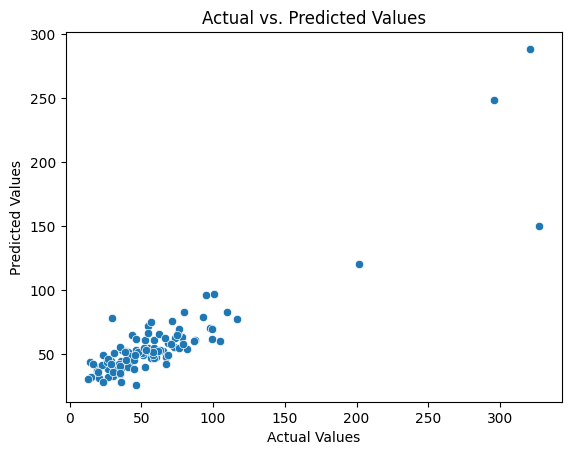

In [28]:
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


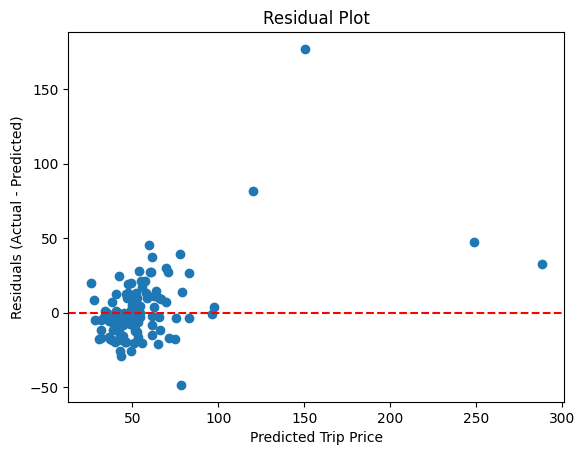

In [29]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Trip Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

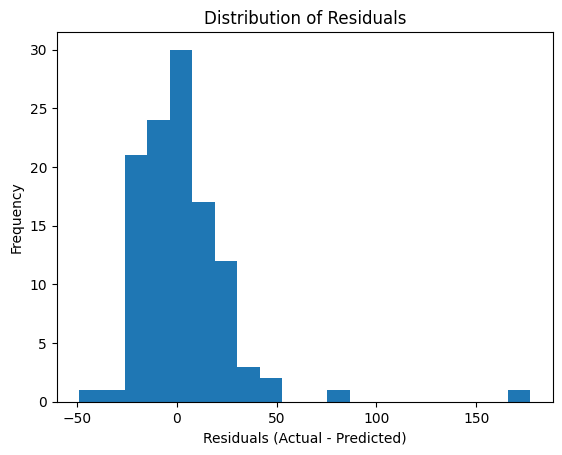

In [30]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()